# MOVIE GENRE CAPSTONE PROJECT

### The main objectieve of this project is to classify the reviews of the movies with the help of BRNN Model.


###  IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### READ THE FILE

In [6]:
df=pd.read_csv('movie_data.csv')

### HEAD

In [4]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### PRINT SOME TEXT

In [5]:
for i in range(10):
    print(df['review'][i],'-', df['sentiment'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

### CHECK INFO

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


### CHECK NULL VALUES

In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

### DESCRIBE

In [8]:
df.describe()

,sentiment
count,49969.000000
mean,0.499950
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### CHECK DUPLICATE VALUES

In [9]:
df.duplicated().sum()

418

In [10]:
df.drop_duplicates(inplace= True, keep = 'first')

In [11]:
df.duplicated().sum()

0

### PLOT A FIGURE OF COUNTPLOT

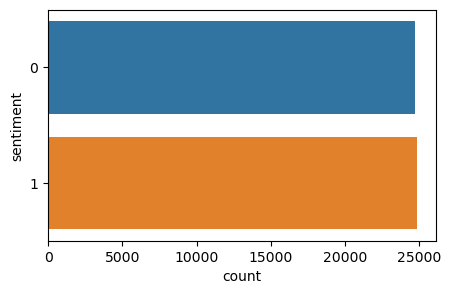

In [12]:
plt.figure(figsize = (5,3))
sns.countplot(y = df['sentiment'])
plt.show()

### PRE PROCESSING

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    lemma = WordNetLemmatizer()
    text= [lemma.lemmatize(i) for i in text ]
    
    return  ' '.join(text)

In [26]:
df['review'] = df['review'].apply(preprocess)

In [27]:
for i in range(10):
    print(df['review'][i])
    print()

This movie is just crap Even though the director claim to be part of that oi culture it s still a very very bad directorial debut The topic itself is very interesting and I accept the bad acting due to the fact that they are all amateur and never acted before but the worst thing about this film are the dialog and very unexperienced and naive directing There s no timing at all in that movie I felt like the director were so exited to do that movie it s their first feature that they actually never really asked themselves what story they wanna tell I met Ben one of the director on several occasion and he s a nice and thoughtful guy but that doesn t make him a director I think that American History X is full of clich s but somehow manages to transport a story Oi Warning is full of clich s doesn t tell anything new or provocative and that s the sad thing about this movie it s far from any Oi Reality br br If you wanna see weird but great German film watch the movie of Michael Haneke Christop

### ASSIGN X & Y

In [7]:
X = df['review']
y = df['sentiment']

### LABEL BINARIZER

In [29]:
from sklearn.preprocessing import LabelBinarizer

In [30]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [31]:
y.shape

(49551, 1)

In [32]:
X.shape

(49551,)

### TRAIN THE DATA

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### TOKENIZE AND FITTING THE DATA

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [13]:
tokenizer = Tokenizer(num_words=128)

In [14]:
tokenizer.fit_on_texts(X)

In [15]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'about': 41,
 'out': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

In [16]:
vocab_size = len(tokenizer.word_index) + 1

In [17]:
def text_encoding(txt):
    encoded_docs=tokenizer.texts_to_sequences(txt)
    padded_sequences=pad_sequences(encoded_docs,maxlen=128)
    return padded_sequences

In [18]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [19]:
X_train.shape

(39975, 128)

In [42]:
X_test.shape

(9911, 128)

In [43]:
y_test.shape

(9911, 1)

In [44]:
y_train.shape

(39640, 1)

### KERAS SEQUENTIAL MODEL WITH BRNN

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

In [27]:
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### COMPILE THE MODEL

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### TRAIN THE MODEL

In [49]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 722s 721ms/step - accuracy: 0.6472 - loss: 0.6269 - val_accuracy: 0.6810 - val_loss: 0.6032
Epoch 2/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 332s 335ms/step - accuracy: 0.6617 - loss: 0.6169 - val_accuracy: 0.7180 - val_loss: 0.5368
Epoch 3/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 330s 333ms/step - accuracy: 0.7411 - loss: 0.5229 - val_accuracy: 0.7384 - val_loss: 0.5210
Epoch 4/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 321s 324ms/step - accuracy: 0.7447 - loss: 0.5165 - val_accuracy: 0.7534 - val_loss: 0.4976
Epoch 5/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 504s 508ms/step - accuracy: 0.7538 - loss: 0.4997 - val_accuracy: 0.7571 - val_loss: 0.4908
Epoch 6/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 514s 519ms/step - accuracy: 0.7618 - loss: 0.4921 - val_accuracy: 0.7622 - val_loss: 0.4855
Epoch 7/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 423s 427ms/step - accuracy: 0.7723 - loss: 0.4724 - val_accuracy: 0.7742 - val_loss: 0.4795
Epoch 8/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 486s 491ms/step - accuracy: 0.7807 -

### PREDIT THE MODEL

In [30]:
     y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step


### CLASSIFICATION 

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
def convert_to_class(y_pred):
    class_labels = []
    for i in y_pred:
        if i < 0.5:
            class_labels.append(0)
        else:
            class_labels.append(1)
    return class_labels

In [32]:
predicted_classes = convert_to_class(y_pred)

### ACCURACY

In [56]:
accuracy_score(y_test,predicted_classes)

0.7857935627081021

### HEAT MAP

<Axes: >

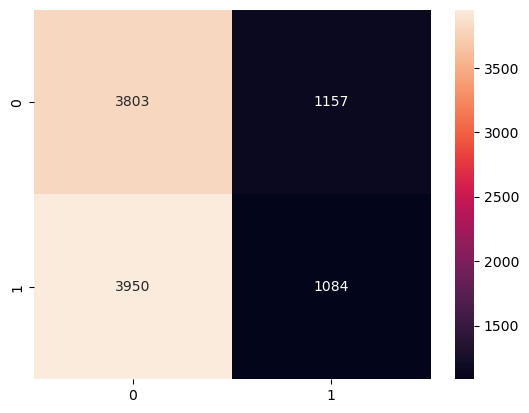

In [33]:
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True,fmt='d')

### CLASSIFICATION REPORT

In [35]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.49      0.77      0.60      4960
           1       0.48      0.22      0.30      5034

    accuracy                           0.49      9994
   macro avg       0.49      0.49      0.45      9994
weighted avg       0.49      0.49      0.45      9994

